# Metoda spadku gradientu (gradient descent)

Mamy problem optymalizacyjny: szukamy parametru $\theta$, dla którego funkcja $f(\theta)$ przyjmuje wartość najmniejszą.

Algorytm:

Iteracyjnie poprawiamy wartość parametru według wzoru:

$$\theta_{new} = \theta_{old} - learning\_rate * \frac{df}{d\theta}$$

Dlaczego tak?
- gdy funkcja dla danego $\theta$ jest rosnąca, to pochodna jest dodatnia, więc przesumamy się w lewo,
- gdy funkcja dla danego $\theta$ jest malejąca, to pochodna jest ujemna, więc przesumamy się w prawo.

W skrócie: sprawdzamy w którą stronę funkcja maleje i tam się przesywamy - tym dalej im nachylenie większe.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    
    """
    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.clear_output(wait=True)
        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

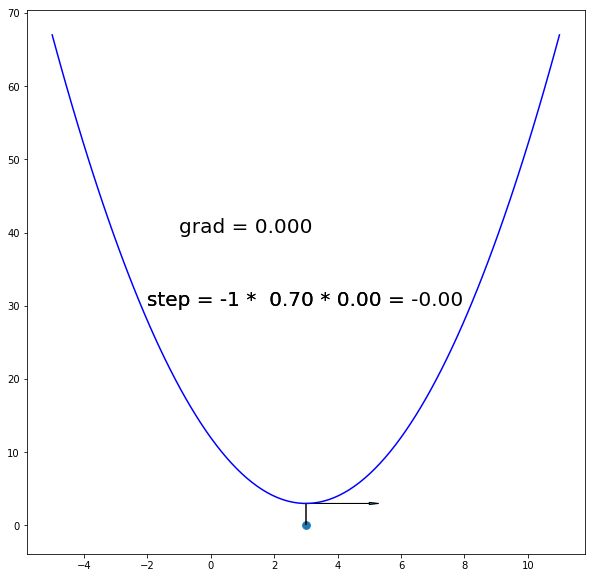

ValueError: 'vertices' must be a 2D list or array with shape Nx2

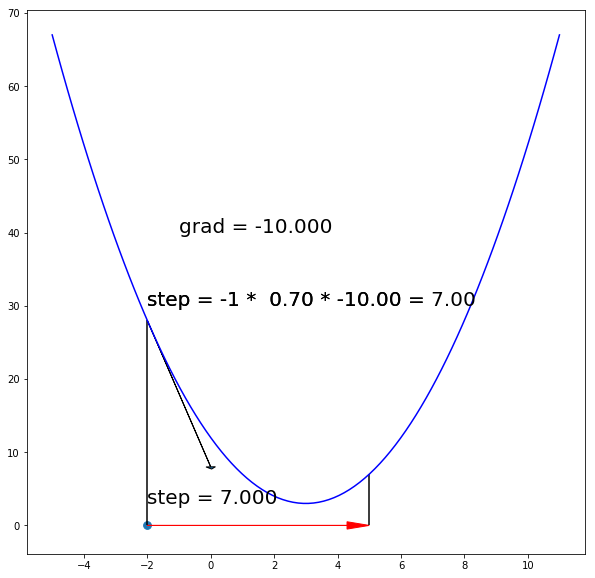

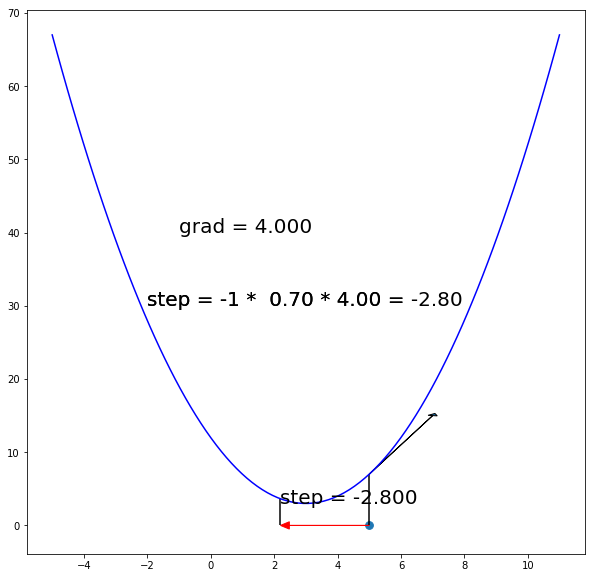

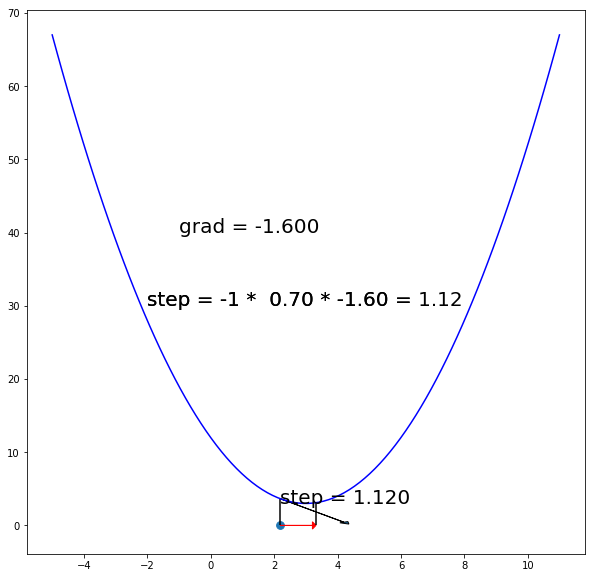

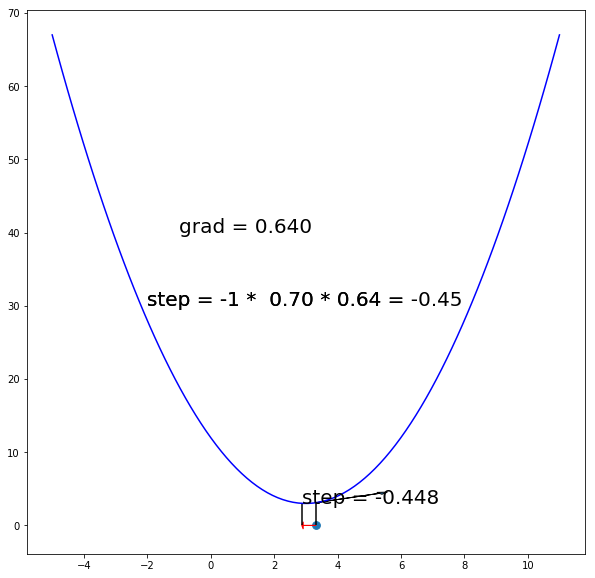

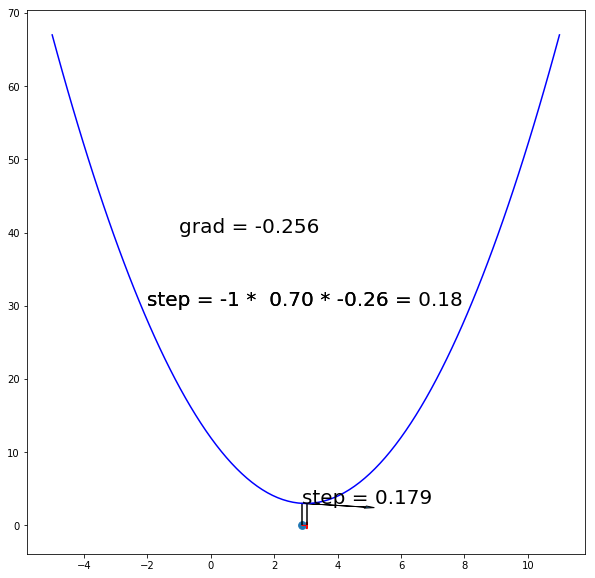

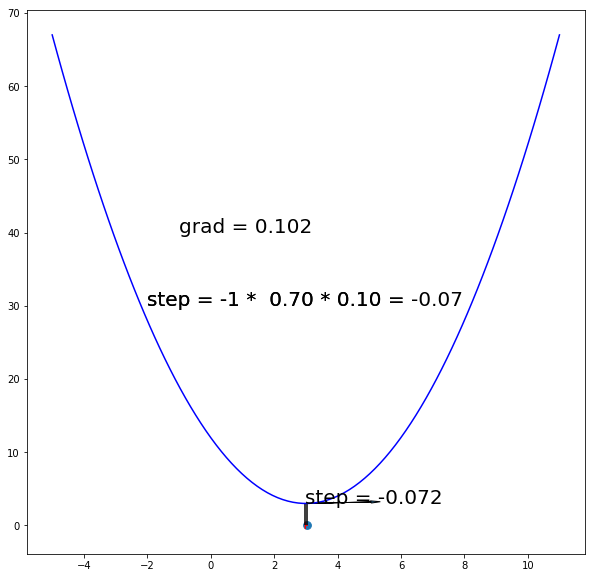

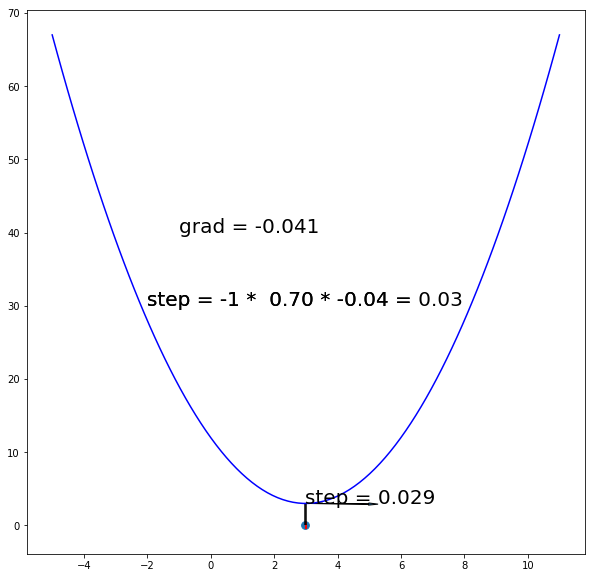

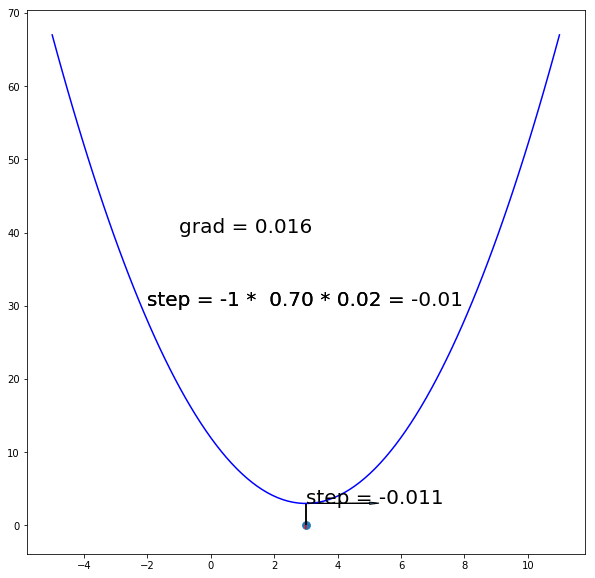

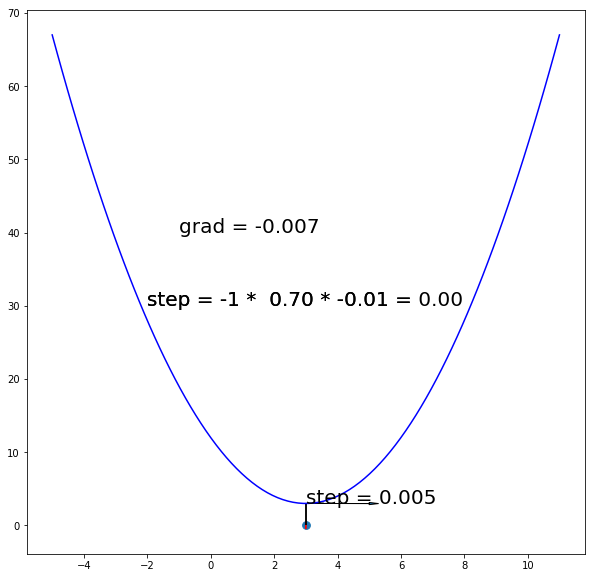

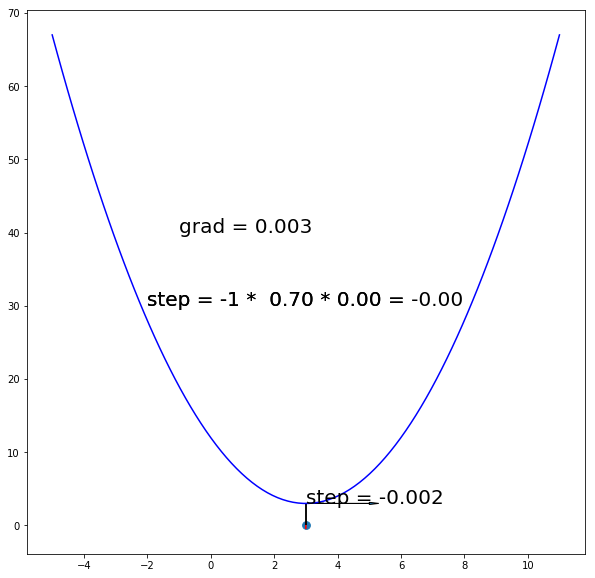

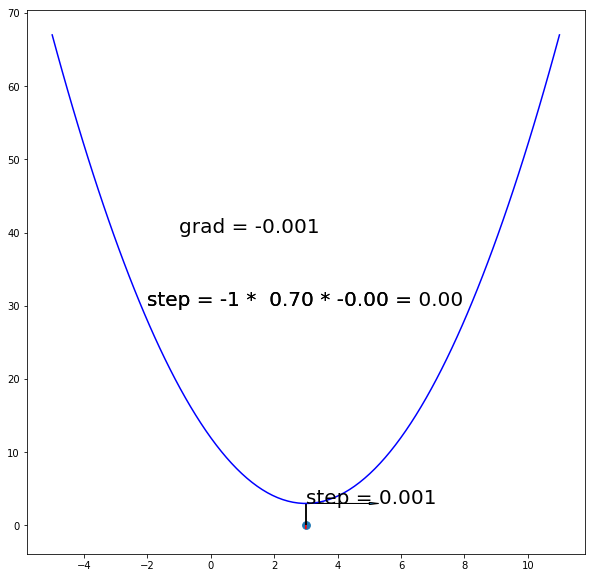

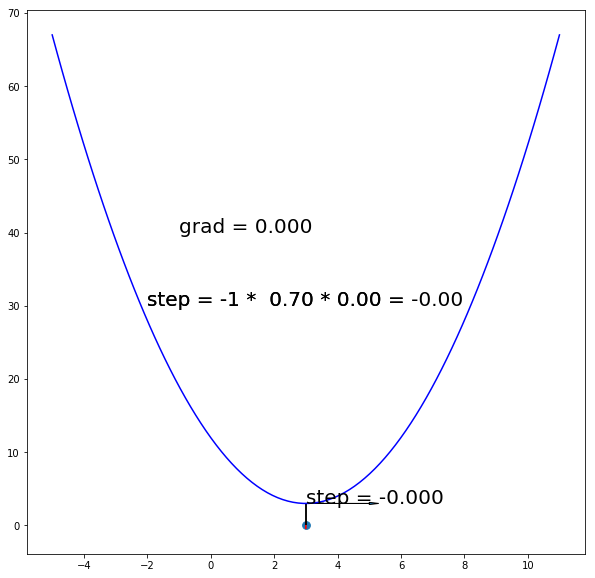

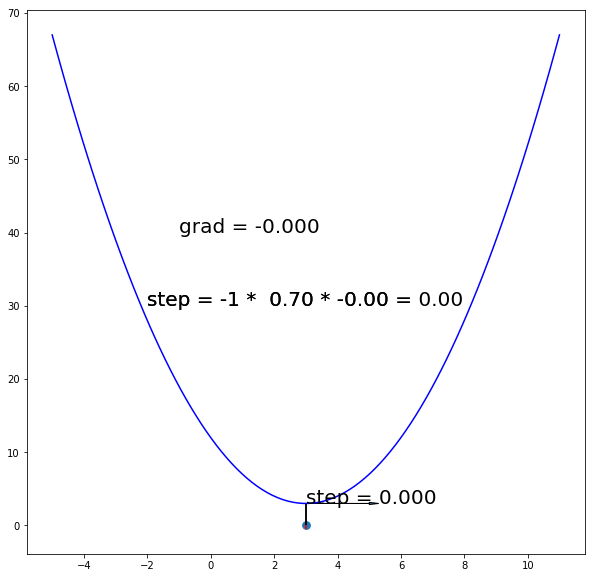

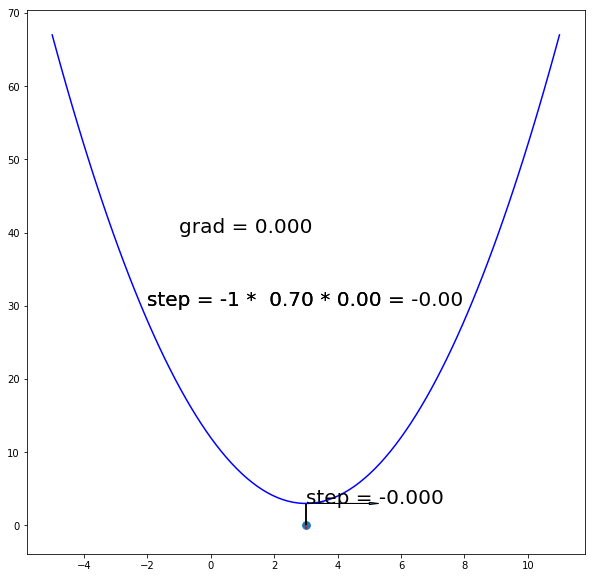

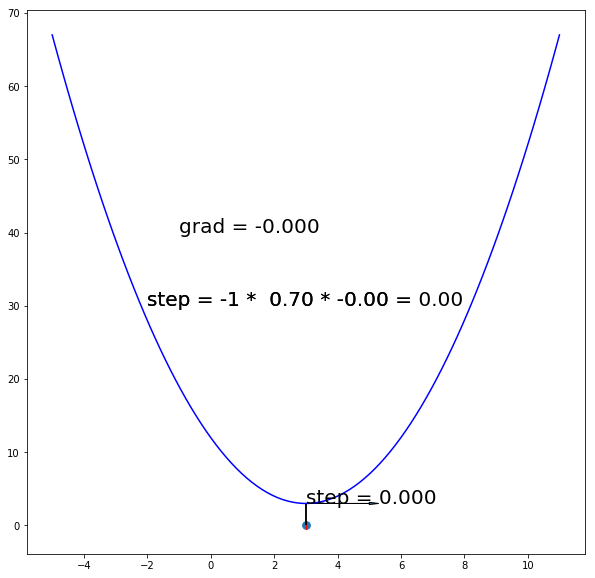

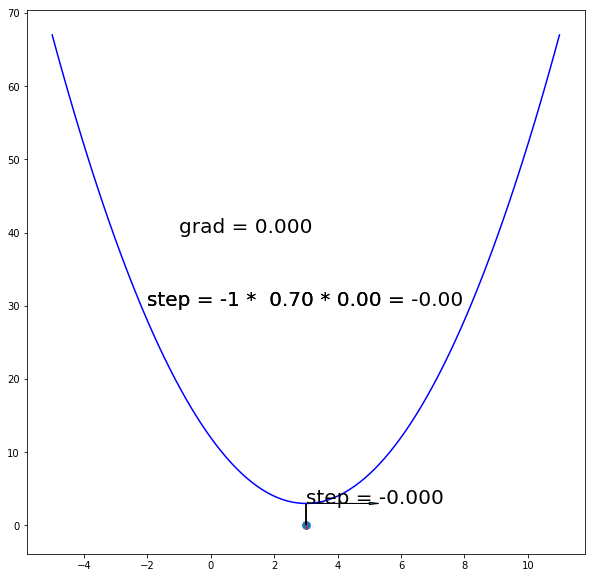

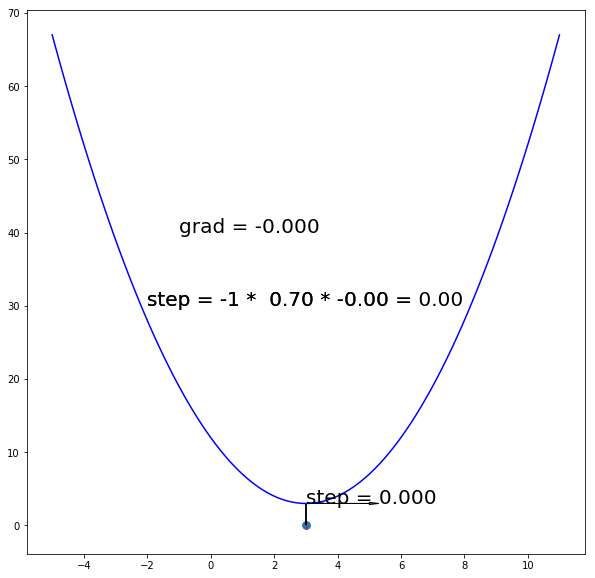

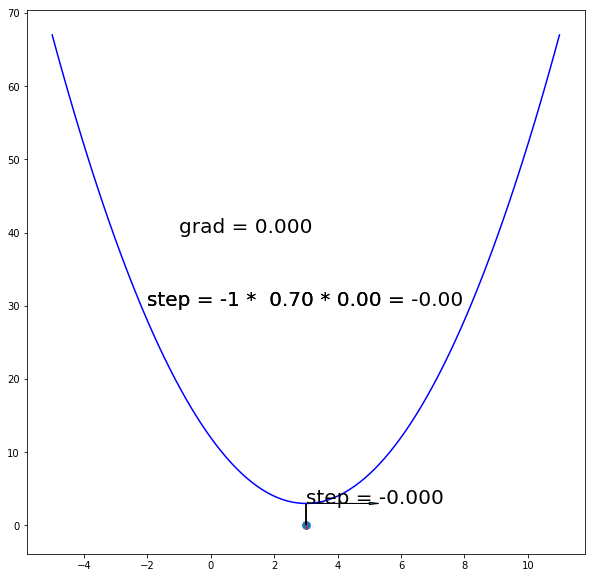

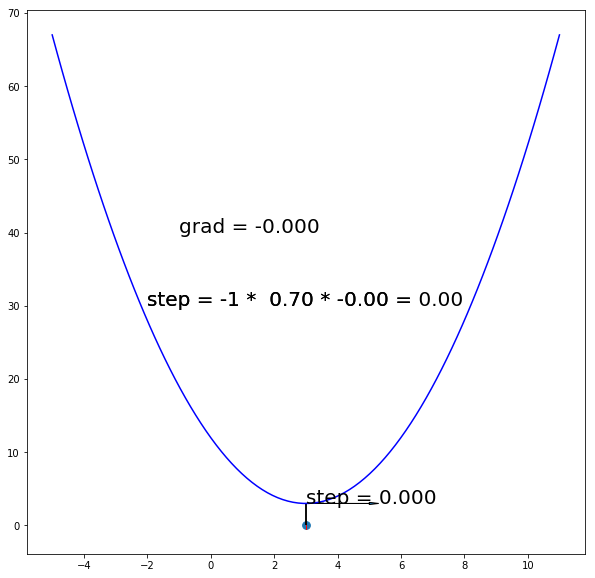

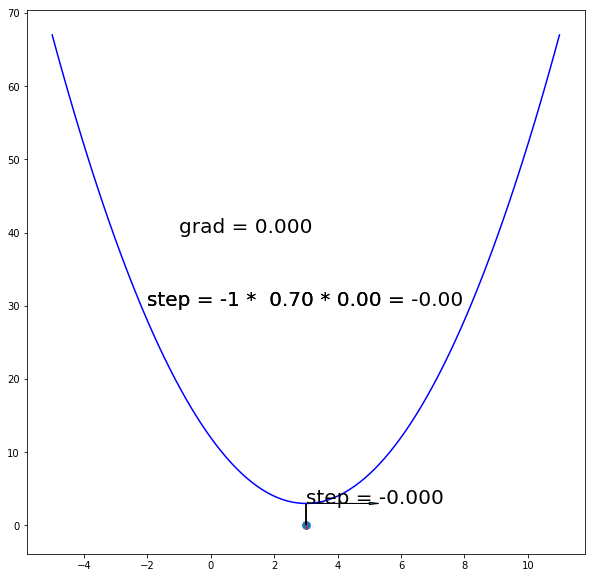

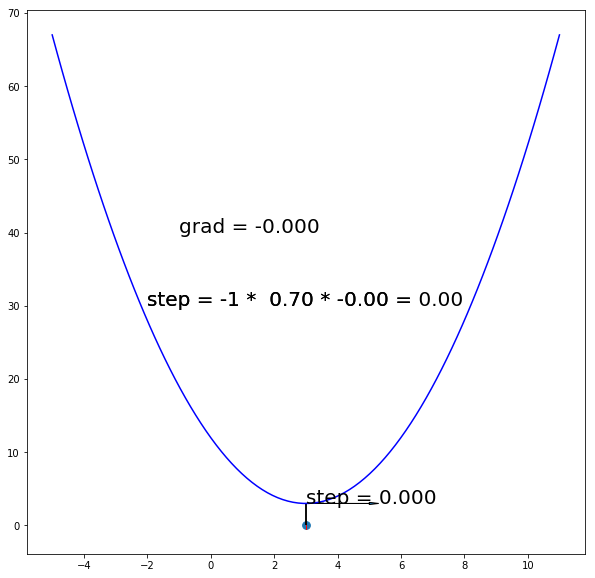

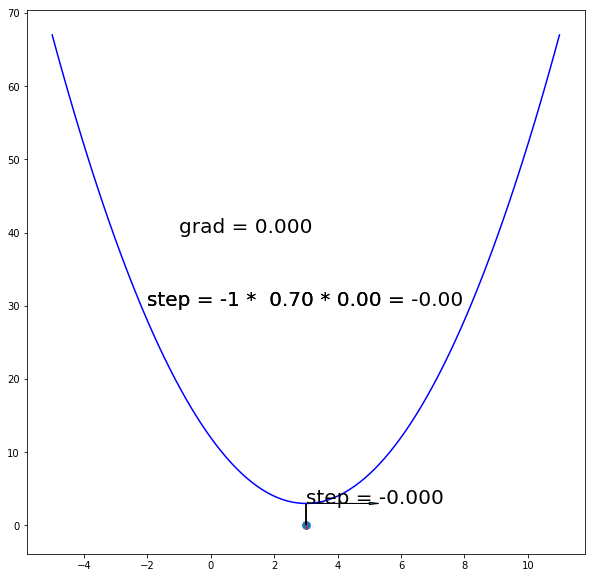

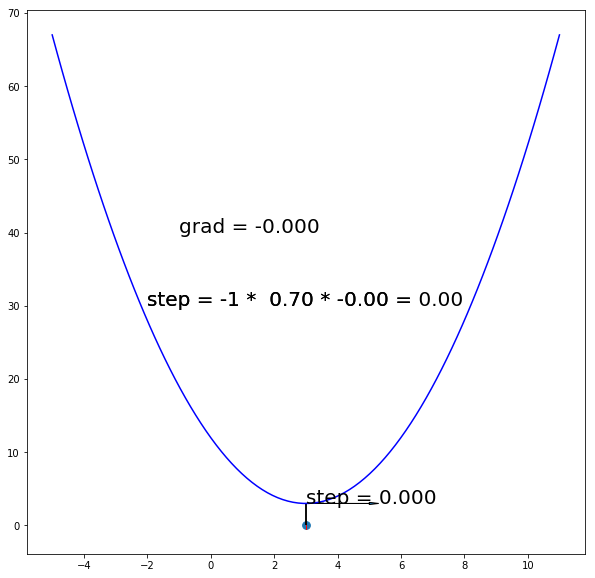

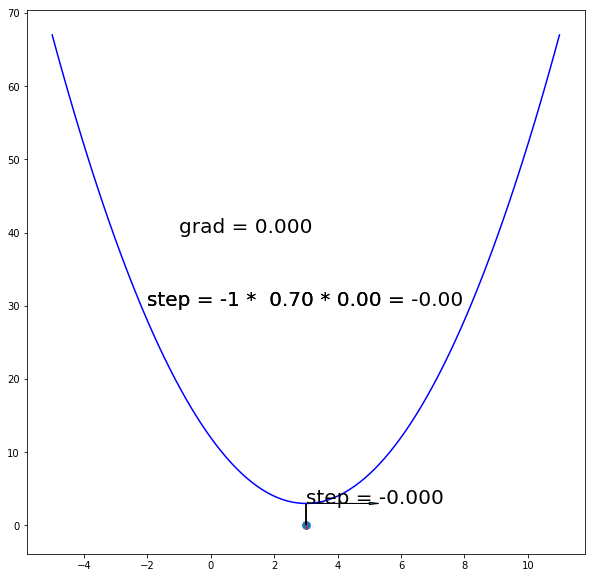

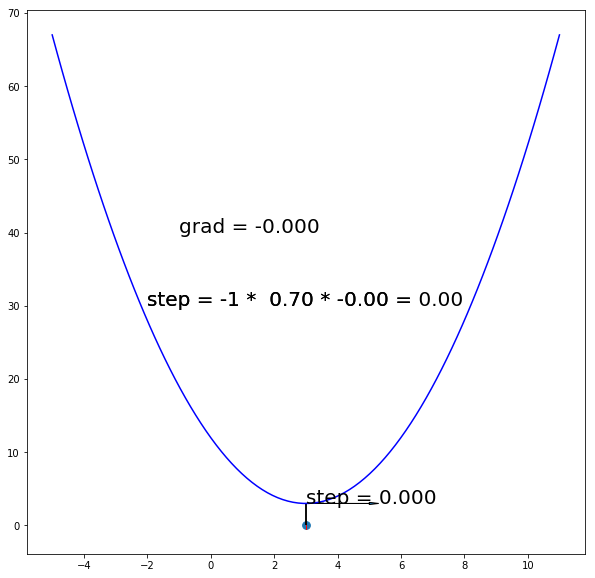

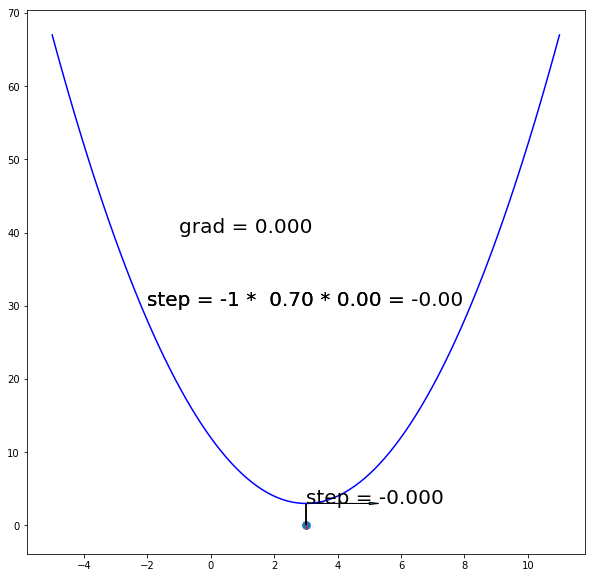

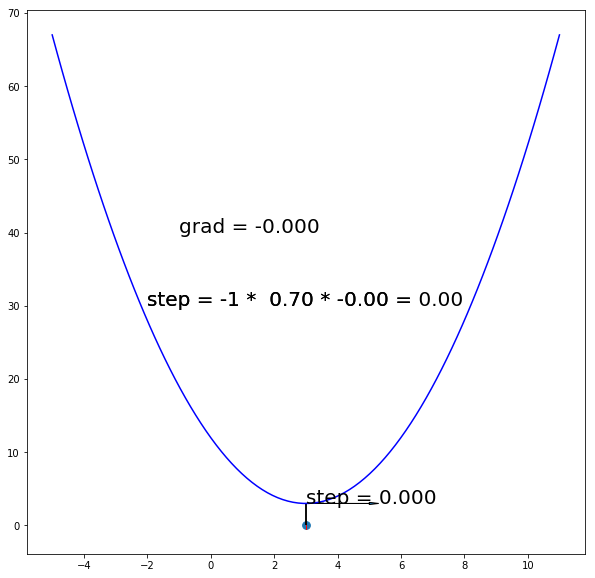

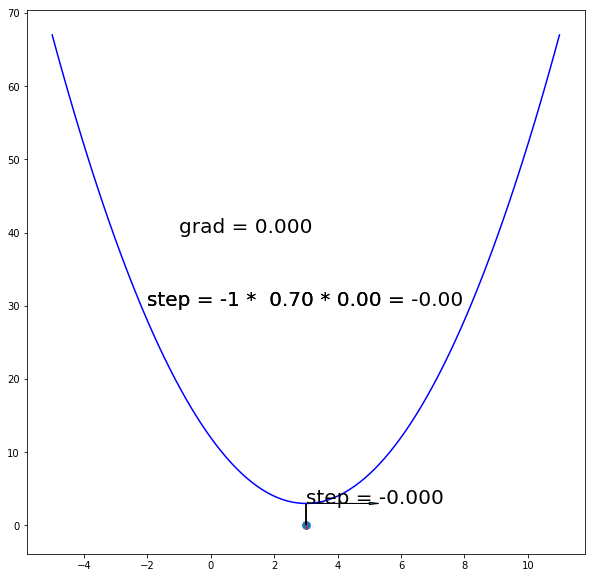

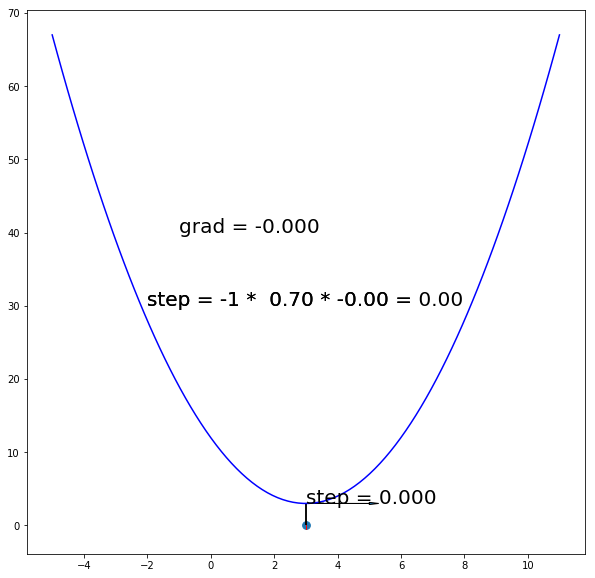

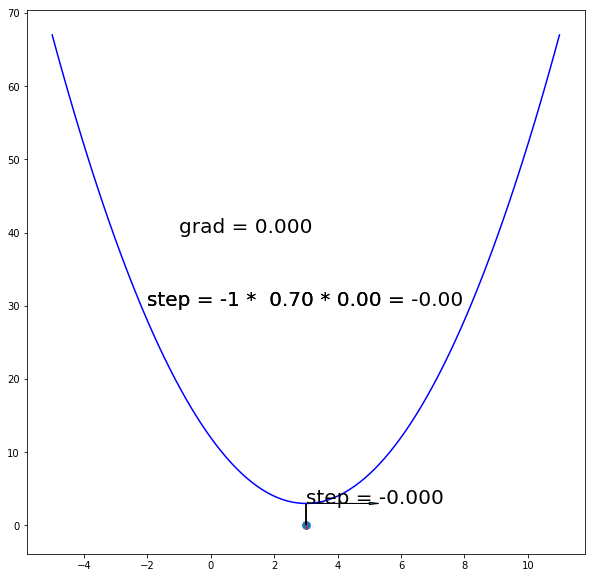

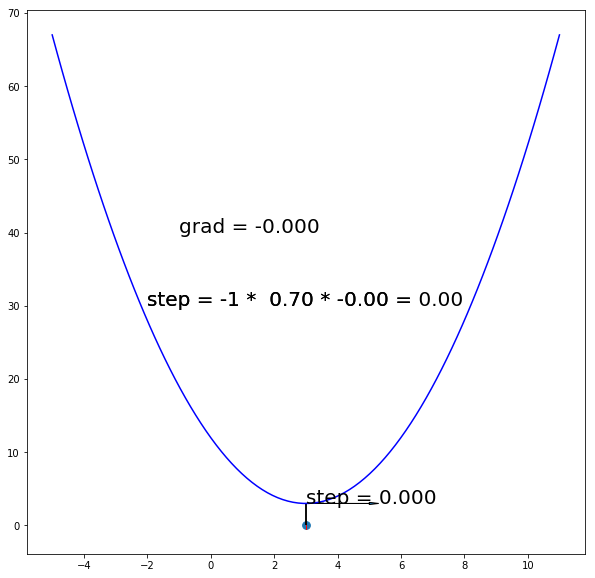

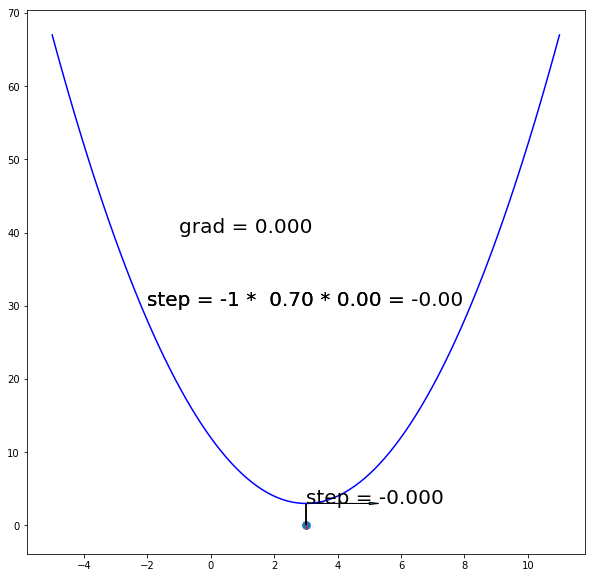

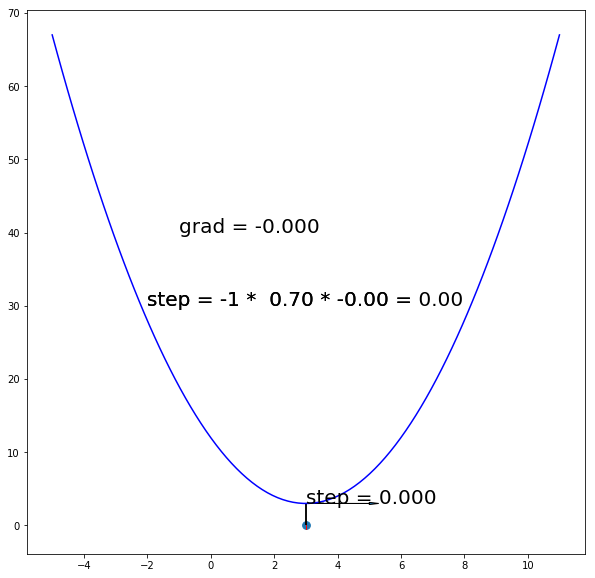

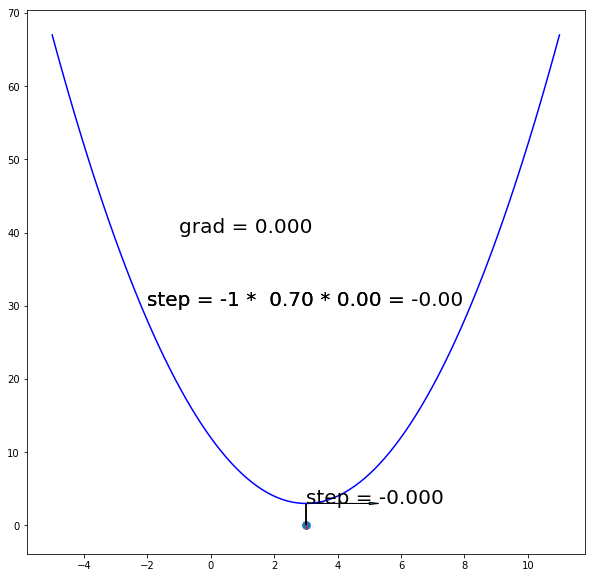

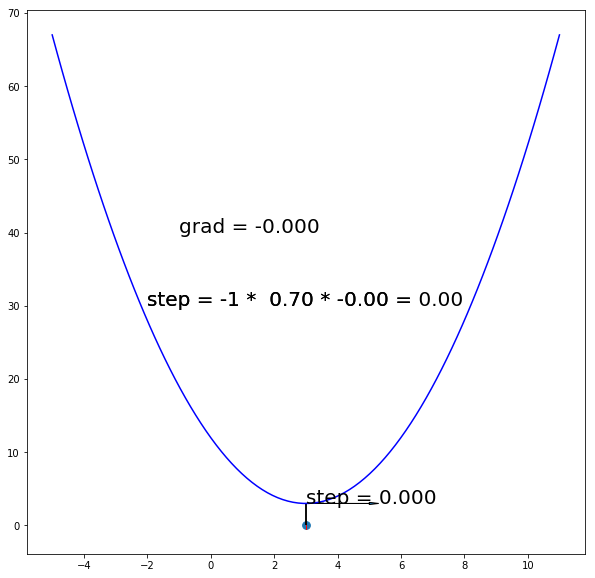

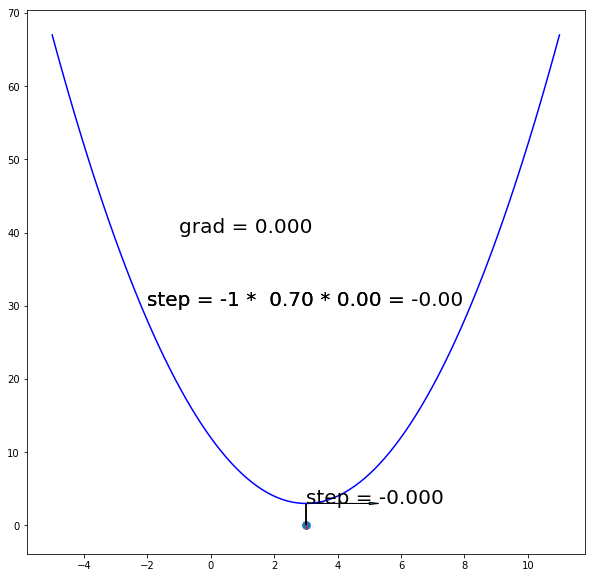

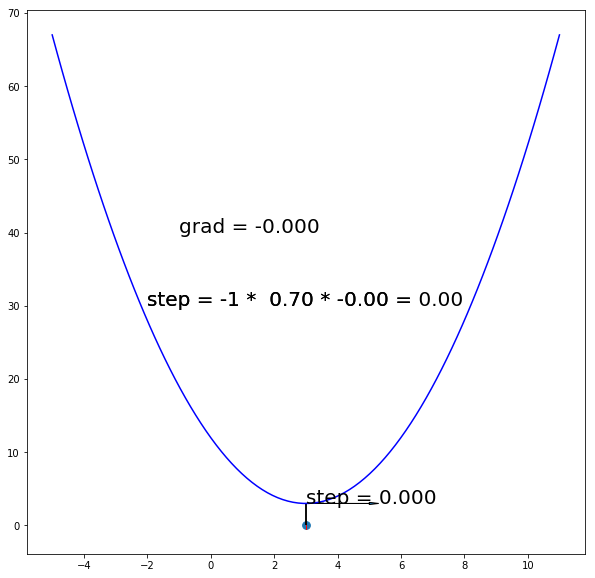

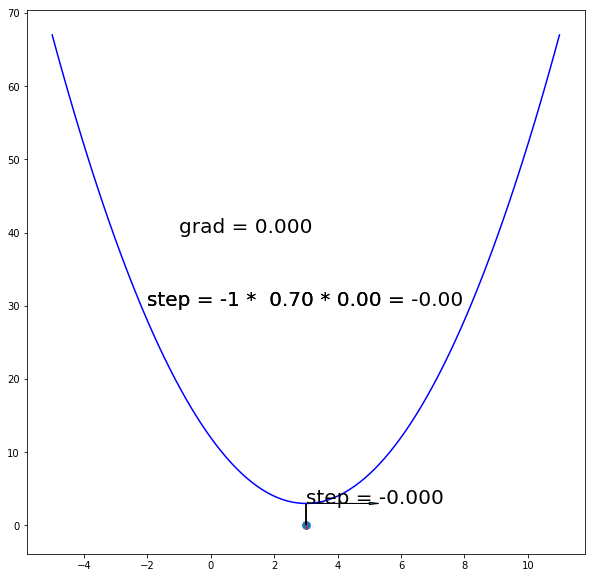

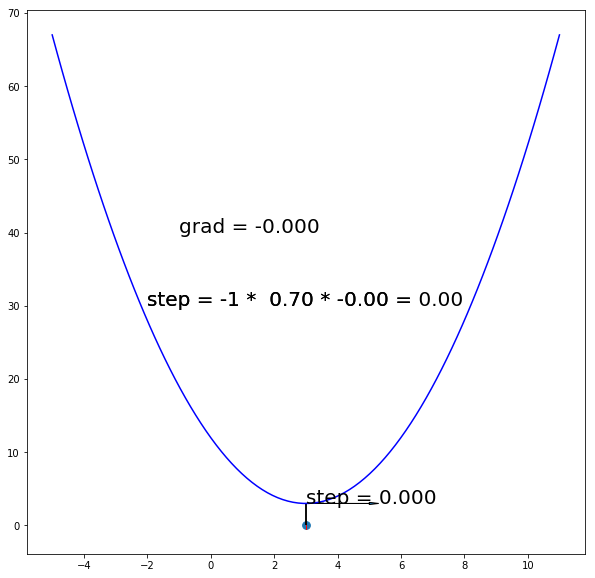

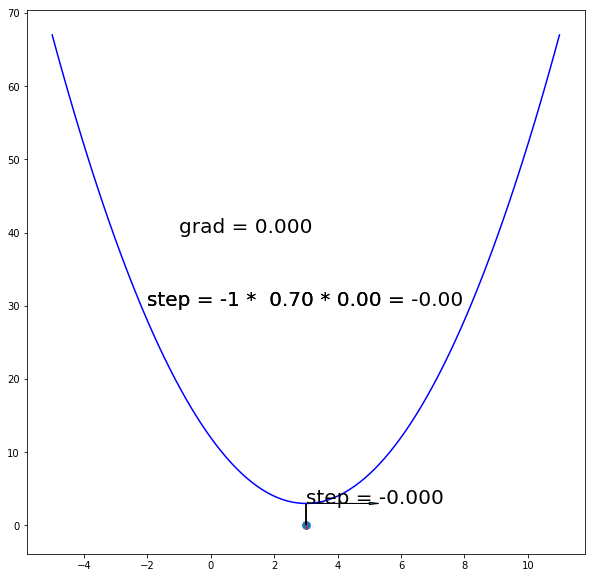

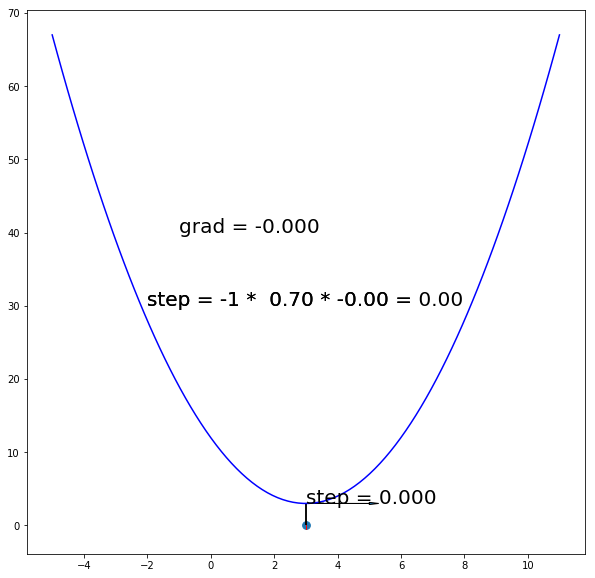

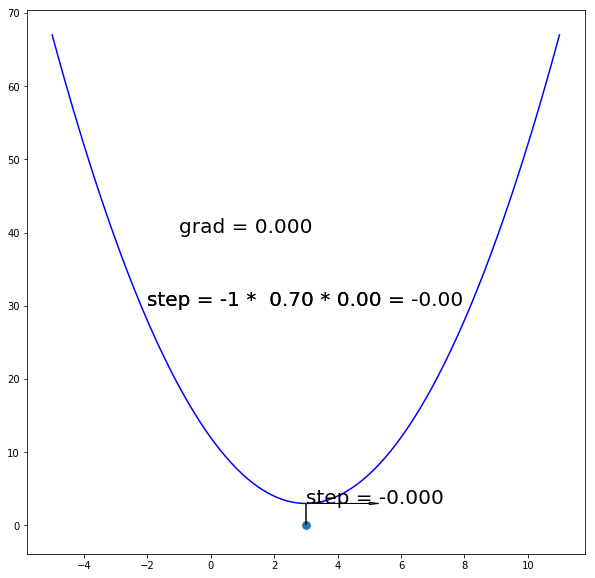

In [3]:
visualise_gradient_decsent(learning_rate=0.7,sec=0.5)

In [ ]:
visualise_gradient_decsent(sec=1)

In [ ]:
visualise_gradient_decsent(learning_rate=1,sec=0.5)

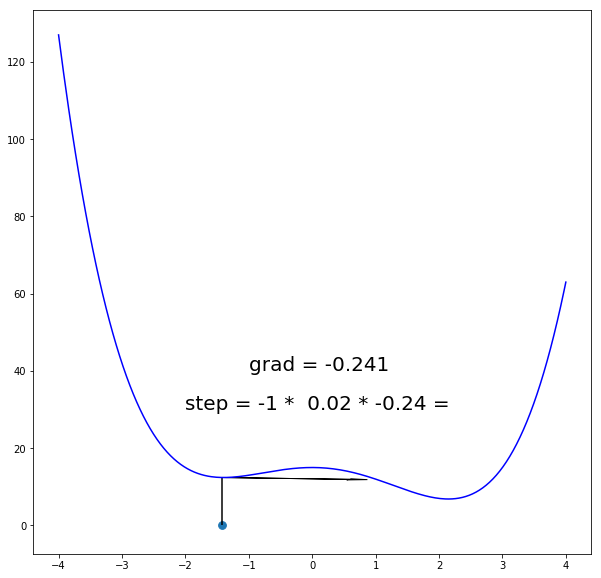

KeyboardInterrupt: 

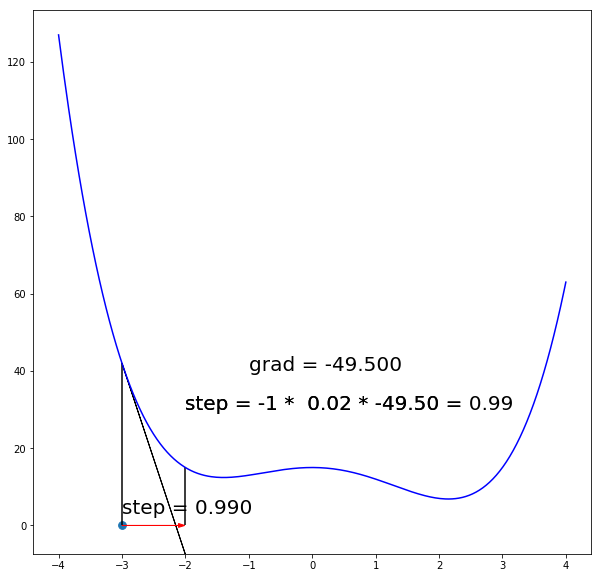

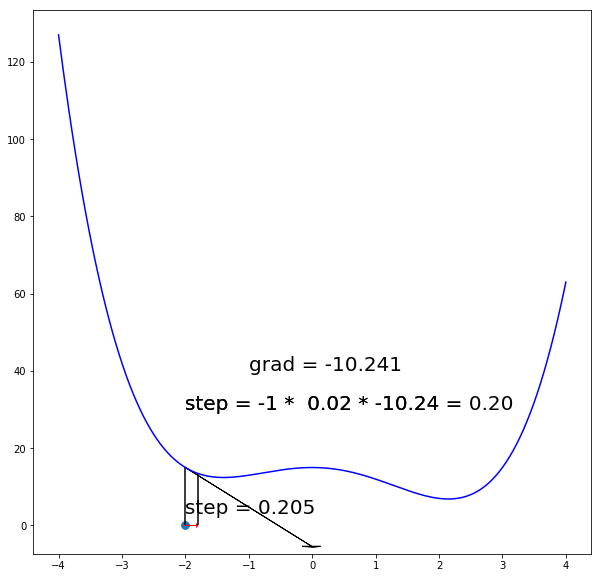

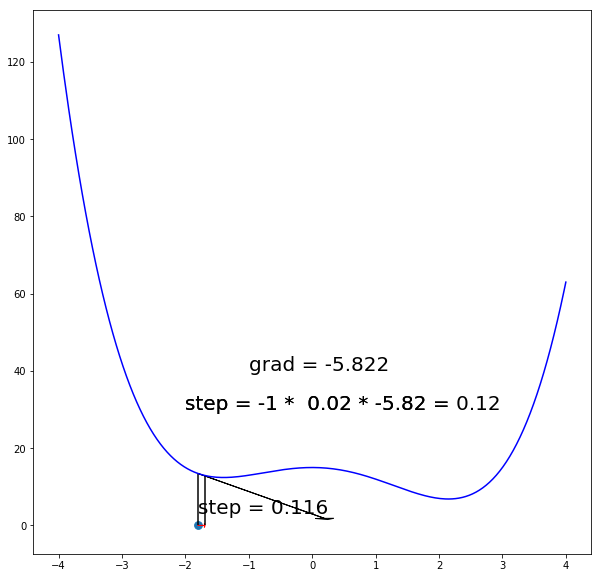

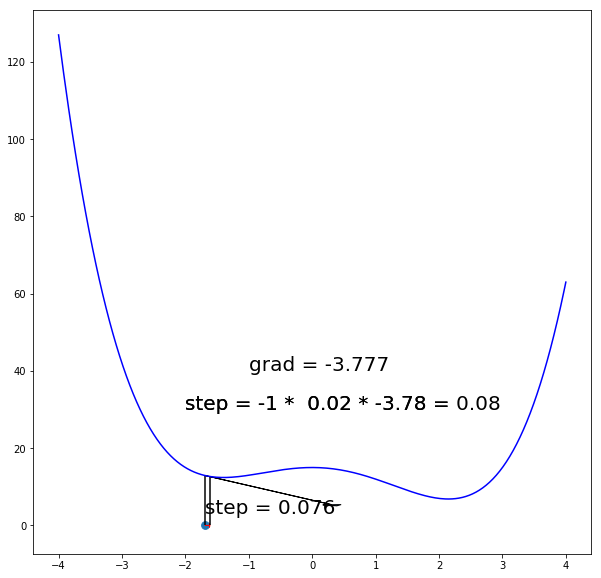

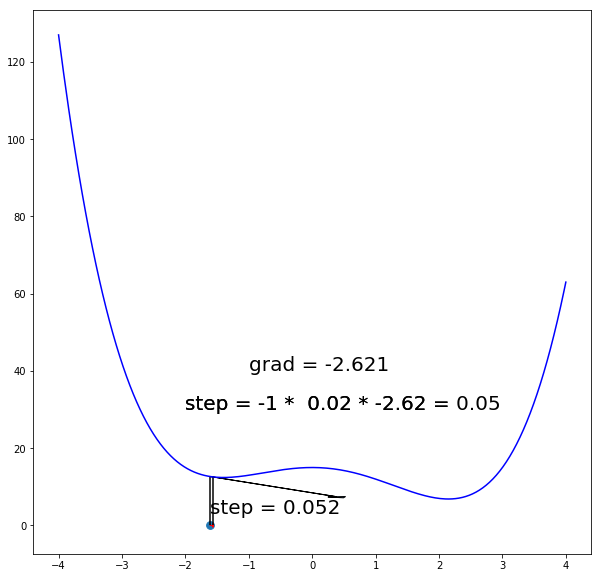

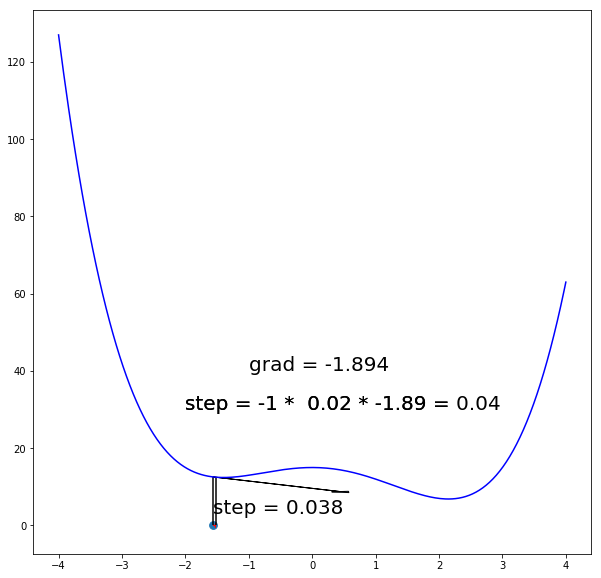

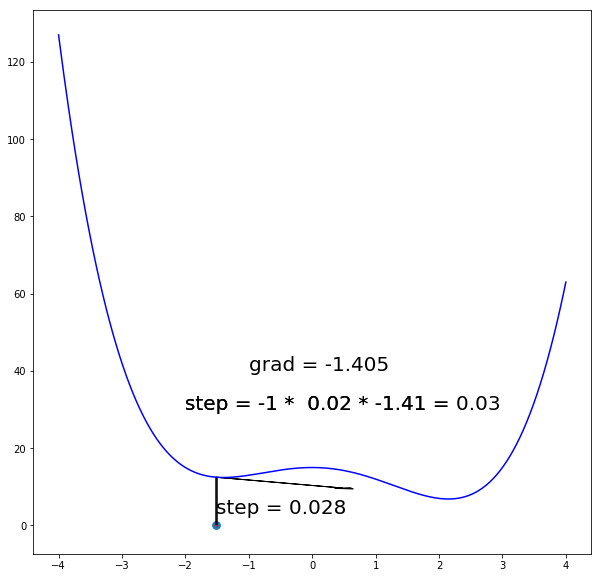

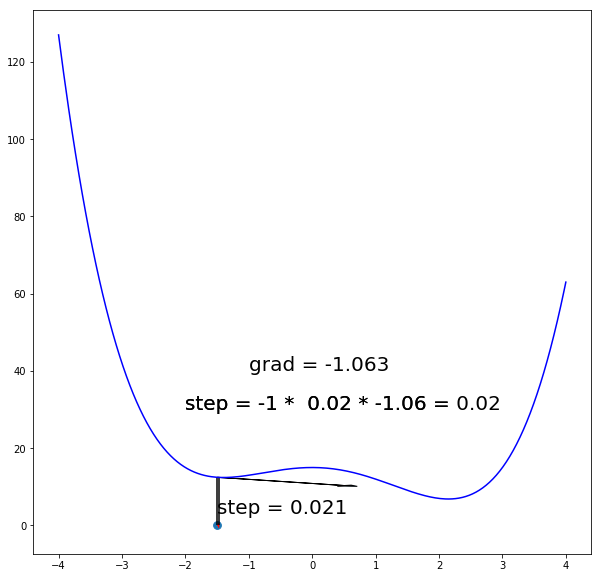

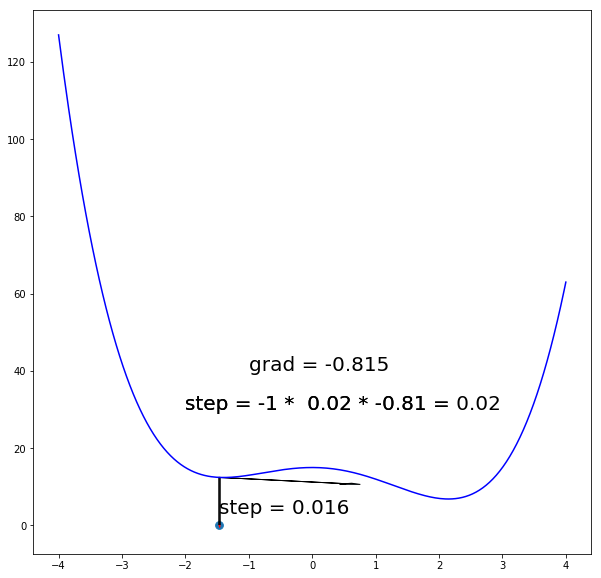

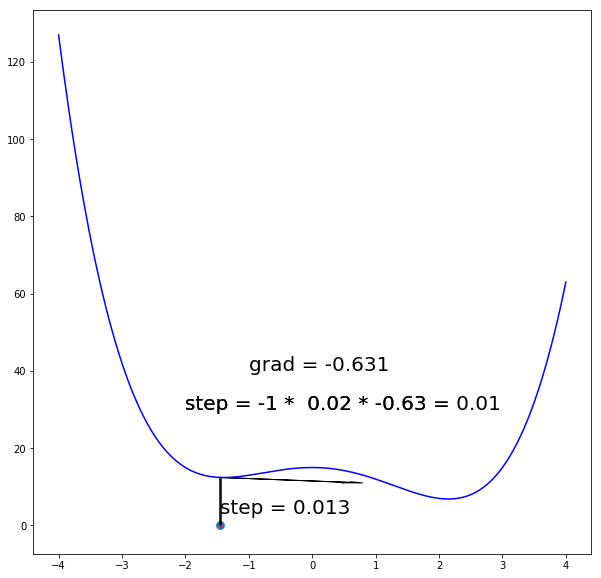

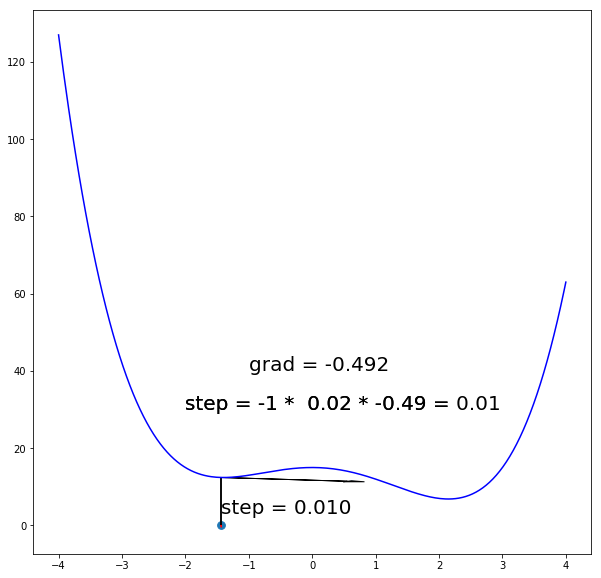

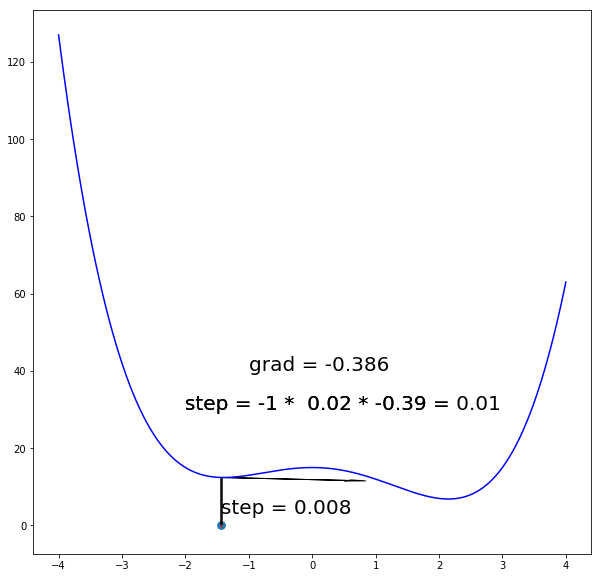

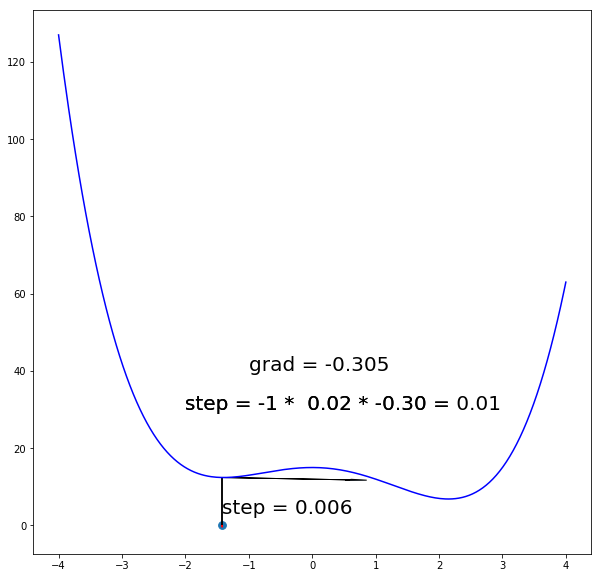

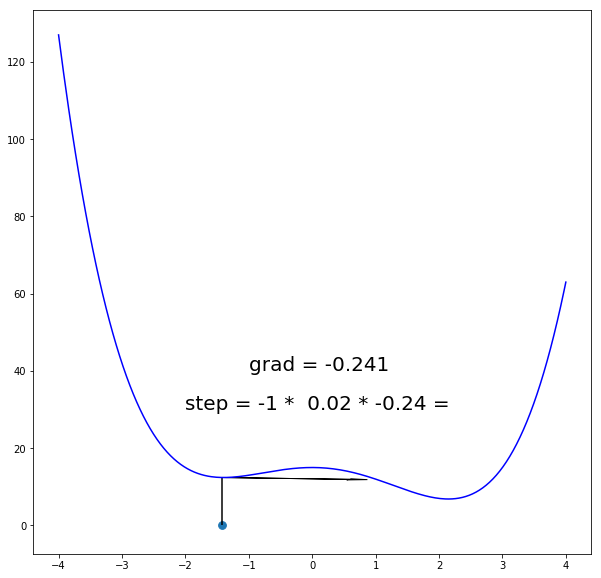

In [4]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.02,x=np.linspace(-4,4,300),sec=1)

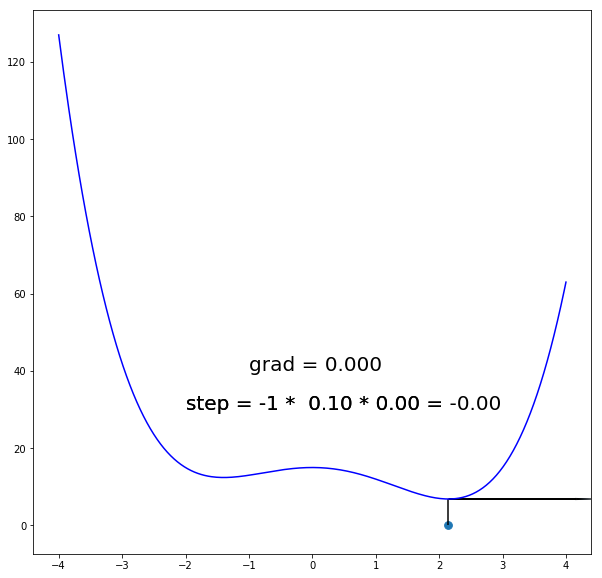

KeyboardInterrupt: 

In [12]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=0.3)

Uczenie odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Gradient decsent:
$$ Cost(\theta) = \frac{1}{n} \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta_k = \theta_k - learning\_rate * \frac{dCost}{d\theta_k}$$

## Stochastic gradient decsent - SGD:


$$ Cost(\theta) = \frac{1}{r} \sum\limits_{i \in \{ i_1, ..., i_r \}} f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta_i = \theta_i - learning\_rate * \frac{df}{d\theta_j}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jeden raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla "batcha" wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna *epoka*.

SGD jest domyślnym algorytmem uczenia sieci neuronowych wszelkiego rodzaju.

# Neuron

<img src="Grafika/neuron.jpg" width="500">

Źródło: https://cdn-images-1.medium.com/max/1600/0*l4ohhbrwQ5MGvmGc.jpg

<br>
<br>

<img src="Grafika/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif

$\sigma(\cdot)$ - funkcja aktywacji

## $\sigma(x) = \frac{1}{1+\exp{(x)}}$

W praktyce popularne są trzy funkcje aktywacji:

- sigmoid
- tangens hiperboliczny
- RELU: $relu(x) = \max{(x,0)}$.

# Neuron jako klasyfikator:  Perceptron

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

In [ ]:
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)


<img src="Grafika/MLP.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


**Uwaga:** "Input layer" pomimo tego, że ma w nazwie słowo "warstwa", to tak naprawdę to nie jest żadna warstwa sieci... To są po prostu dane wejściowe... Niestety przyjęło się literaturze nazywanie tego w ten sposób, co jest mylące :(


Sieci uczy sie metodą spadku gradientu (pewnymi wariantami tej metody). Uczenie wykorzystuje algorytm **propagacji wsteczej** (https://en.wikipedia.org/wiki/Backpropagation).

<br>

<br>

<br>

**Uwaga!** Sieci neuronowe absolutnie zawsze wymagają zestandaryzowanych danych! Niezależnie od tego czy wykorzystujemy regularyzację czy nie i niezależnie od typu sieci!

<br>

<br>

## Wizualizacja obszarów decyzyjnych w zależności od liczby neuronów

### (sieć jednowarstwowa)

<img src="Grafika/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png

<br>

### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nie zadziałają przypadkiem lepiej. Przy czym jeżeli dla dwóch wartsw jest gorzej, to nie ma sensu sprawdzać dla większej ilości.

In [6]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [8]:
dataset = np.loadtxt('pima-indians-diabetes.data', delimiter=",")


X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####


models = [LogisticRegression(),
          DecisionTreeClassifier(),
          SVC(probability=True), 
          LinearDiscriminantAnalysis(), 
          QuadraticDiscriminantAnalysis(), 
          RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = np.round(y_pred)

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

(768, 8)
0.3489583333333333
Accuracy: 77.95% AUC:  0.8284353193773484
Accuracy: 71.26% AUC:  0.680756843800322
Accuracy: 76.38% AUC:  0.8344739667203436
Accuracy: 77.17% AUC:  0.8307165861513688
Accuracy: 73.62% AUC:  0.7859634997316157
Accuracy: 74.41% AUC:  0.8029723564143854


/home/olszewskip/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/olszewskip/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
from sklearn.neural_network import MLPClassifier

In [14]:
?MLPClassifier

Jak widzimy MLP w sklearnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić,
gdy pracujemy nad prostym problemem klasyfikacji, gdzie naszymi danymi jest tabelka, bo eksperymenty nie zajmują duzo czasu. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [15]:
model = MLPClassifier((20,10))
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)[:,1]
predictions = y_pred.round()

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

Accuracy: 76.77% AUC:  0.8222624798711754


/home/olszewskip/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
# Wczytaj dane treningowe i testowe

import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()



dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape)
X_test.shape

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/kodolamacz/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


(30162, 41)


(15060, 41)

Sprawdźmy wyniki na surowych danych.

In [48]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [49]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.1, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.79151, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.81306, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.80941, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.80046, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.82930, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.82831, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.82632, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.82897, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.83394, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.83295, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.82433, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.82201, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [51]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.83074369189907038

### A teraz tak jak się powinno - na wystandaryzowanych.

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.15),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=None, test_size=0.15, train_size=None),
       error_score='accuracy',
       estimator=MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.15,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [5, 10, 15, 30, 50, 100, 250, 500, 750, 1000, 2000, 3000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
gs.grid_scores_

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.84597, std: 0.00000, params: {'hidden_layer_sizes': 5},
 mean: 0.84906, std: 0.00000, params: {'hidden_layer_sizes': 10},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 15},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 30},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 50},
 mean: 0.84729, std: 0.00000, params: {'hidden_layer_sizes': 100},
 mean: 0.84906, std: 0.00000, params: {'hidden_layer_sizes': 250},
 mean: 0.84530, std: 0.00000, params: {'hidden_layer_sizes': 500},
 mean: 0.84619, std: 0.00000, params: {'hidden_layer_sizes': 750},
 mean: 0.84685, std: 0.00000, params: {'hidden_layer_sizes': 1000},
 mean: 0.83823, std: 0.00000, params: {'hidden_layer_sizes': 2000},
 mean: 0.84884, std: 0.00000, params: {'hidden_layer_sizes': 3000}]

In [56]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

0.84588313413014604

# Keras

In [20]:
X.shape

(768, 8)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

In [26]:
model.add(Dense(100, activation="sigmoid", input_shape=(X.shape[1],) ) )

In [27]:
model.add(Dense(50, activation="sigmoid"))

In [28]:
model.add(Dense(10, activation="sigmoid"))

In [29]:
model.add(Dense(1, activation="sigmoid"))

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 6,471
Trainable params: 6,471
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
X_train.shape

(514, 8)

In [36]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
514/514 [==============================] - 1s 1ms/step - loss: 0.6500 - acc: 0.6576
Epoch 2/10
514/514 [==============================] - 0s 91us/step - loss: 0.6396 - acc: 0.6576
Epoch 3/10
514/514 [==============================] - 0s 95us/step - loss: 0.6368 - acc: 0.6576
Epoch 4/10
514/514 [==============================] - 0s 82us/step - loss: 0.6322 - acc: 0.6576
Epoch 5/10
514/514 [==============================] - 0s 95us/step - loss: 0.6251 - acc: 0.6576
Epoch 6/10
514/514 [==============================] - 0s 114us/step - loss: 0.6181 - acc: 0.6576
Epoch 7/10
514/514 [==============================] - 0s 119us/step - loss: 0.6063 - acc: 0.6576
Epoch 8/10
514/514 [==============================] - 0s 100us/step - loss: 0.5942 - acc: 0.6576
Epoch 9/10
514/514 [==============================] - 0s 99us/step - loss: 0.5831 - acc: 0.6634
Epoch 10/10
514/514 [==============================] - 0s 104us/step - loss: 0.5704 - acc: 0.6732


In [37]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
514/514 [==============================] - 0s 140us/step - loss: 0.5604 - acc: 0.7374
Epoch 2/50
514/514 [==============================] - 0s 108us/step - loss: 0.5468 - acc: 0.7432
Epoch 3/50
514/514 [==============================] - 0s 113us/step - loss: 0.5400 - acc: 0.7354
Epoch 4/50
514/514 [==============================] - 0s 101us/step - loss: 0.5302 - acc: 0.7529
Epoch 5/50
514/514 [==============================] - 0s 102us/step - loss: 0.5238 - acc: 0.7646
Epoch 6/50
514/514 [==============================] - 0s 108us/step - loss: 0.5154 - acc: 0.7588
Epoch 7/50
514/514 [==============================] - 0s 112us/step - loss: 0.5077 - acc: 0.7665
Epoch 8/50
514/514 [==============================] - 0s 122us/step - loss: 0.5020 - acc: 0.7724
Epoch 9/50
514/514 [==============================] - 0s 93us/step - loss: 0.4959 - acc: 0.7685
Epoch 10/50
514/514 [==============================] - 0s 109us/step - loss: 0.4919 - acc: 0.7665
Epoch 11/50
514/514 [=========

In [40]:
model.predict(X_test)

array([[0.07770689],
       [0.7725808 ],
       [0.72099704],
       [0.09160288],
       [0.45745856],
       [0.575615  ],
       [0.07991495],
       [0.31934404],
       [0.7801687 ],
       [0.11174896],
       [0.76543504],
       [0.07904106],
       [0.7395638 ],
       [0.7657271 ],
       [0.51324296],
       [0.12494402],
       [0.20688312],
       [0.15690842],
       [0.11663516],
       [0.22714567],
       [0.48479658],
       [0.23445417],
       [0.7551966 ],
       [0.6949373 ],
       [0.12336154],
       [0.11706425],
       [0.0793215 ],
       [0.50765735],
       [0.21424682],
       [0.3193373 ],
       [0.48235655],
       [0.21196607],
       [0.09836002],
       [0.68748486],
       [0.06341338],
       [0.11737301],
       [0.38302413],
       [0.160013  ],
       [0.706467  ],
       [0.7418376 ],
       [0.7053646 ],
       [0.7002094 ],
       [0.36299625],
       [0.06224412],
       [0.19405927],
       [0.13828176],
       [0.6364981 ],
       [0.294

In [39]:
model.evaluate(X_test, y_test)

254/254 [==============================] - 0s 290us/step


[0.4870765645672956, 0.7559055141576632]

In [58]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout

In [59]:
model = Sequential()
model.add(Dense(5,activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.002) ) )
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid", kernel_regularizer=l2(0.02)) )

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(patience=3)
save_best_model = ModelCheckpoint("wagi_best.h5py", save_best_only=True)

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.3,
          callbacks=[early_stopping, save_best_model])

model.load_weights("wagi_best.h5py")
model.evaluate(X_test, y_test)

Train on 359 samples, validate on 155 samples
Epoch 1/100
359/359 [==============================] - 1s 2ms/step - loss: 1.0176 - acc: 0.5822 - val_loss: 0.8283 - val_acc: 0.6774
Epoch 2/100
359/359 [==============================] - 0s 129us/step - loss: 1.0455 - acc: 0.5571 - val_loss: 0.8091 - val_acc: 0.6839
Epoch 3/100
359/359 [==============================] - 0s 151us/step - loss: 0.9525 - acc: 0.5404 - val_loss: 0.7939 - val_acc: 0.6839
Epoch 4/100
359/359 [==============================] - 0s 170us/step - loss: 0.9642 - acc: 0.5682 - val_loss: 0.7795 - val_acc: 0.6839
Epoch 5/100
359/359 [==============================] - 0s 138us/step - loss: 0.9482 - acc: 0.5794 - val_loss: 0.7647 - val_acc: 0.6903
Epoch 6/100
359/359 [==============================] - 0s 228us/step - loss: 0.9008 - acc: 0.5766 - val_loss: 0.7514 - val_acc: 0.6968
Epoch 7/100
359/359 [==============================] - 0s 171us/step - loss: 0.8733 - acc: 0.5682 - val_loss: 0.7398 - val_acc: 0.6968
Epoch 8/100

Epoch 61/100
359/359 [==============================] - 0s 144us/step - loss: 0.5906 - acc: 0.6574 - val_loss: 0.5614 - val_acc: 0.7484
Epoch 62/100
359/359 [==============================] - 0s 185us/step - loss: 0.5791 - acc: 0.6852 - val_loss: 0.5610 - val_acc: 0.7419
Epoch 63/100
359/359 [==============================] - 0s 126us/step - loss: 0.6050 - acc: 0.6490 - val_loss: 0.5605 - val_acc: 0.7419
Epoch 64/100
359/359 [==============================] - 0s 141us/step - loss: 0.5584 - acc: 0.7047 - val_loss: 0.5602 - val_acc: 0.7419
Epoch 65/100
359/359 [==============================] - 0s 117us/step - loss: 0.6130 - acc: 0.6351 - val_loss: 0.5599 - val_acc: 0.7419
Epoch 66/100
359/359 [==============================] - 0s 138us/step - loss: 0.5802 - acc: 0.6685 - val_loss: 0.5595 - val_acc: 0.7419
Epoch 67/100
359/359 [==============================] - 0s 194us/step - loss: 0.6006 - acc: 0.6713 - val_loss: 0.5593 - val_acc: 0.7419
Epoch 68/100
359/359 [==========================

[0.5682875204274035, 0.7165354354175058]

### Cwiczenie

Zaimplementuj funkcję `construct_mlp(layer_sizes, input_shape, add_dropout, dropout_rate, compile=False)`, która zwraca kerasowy model, gdzie:
- `layer_sizes` - krotka rozmiarow kolejnych warstw dense,
- `input_shape` - ksztalt danych wejsciowych
- `add_dropout` - jeśli `True`, to po każdej warstwie dense w sieci umieszcamy dropout
- `dropout_rate` - stopien ewentualnego dropoutu
- `compile` - jeśli `True`, to zwracamy skompilowany model

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dropout

In [65]:
def construct_mlp(layer_sizes, input_shape, add_dropout, dropout_rate, compile_=False):
    model = Sequential()
    
    model.add(Dense(layer_sizes[0], activation="relu", input_shape=input_shape ) )
    
    for layer_size in layer_sizes[1:]:
        
        model.add(Dense(layer_size, activation="relu" ) )
        
        if add_dropout:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1,activation="sigmoid") )
    
    if compile_:
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#   early_stopping = EarlyStopping(patience=3)
#   save_best_model = ModelCheckpoint("wagi_best.h5py", save_best_only=True)

#   model.fit(X_train, y_train,
#             batch_size=32,
#             epochs=100,
#             validation_split=0.3,
#             callbacks=[early_stopping, save_best_model])

    return model

In [66]:
model1 = construct_mlp([100, 50, 10], (X.shape[1],), True, 0.5, True)

In [68]:
model1.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.3)

Train on 359 samples, validate on 155 samples
Epoch 1/100
359/359 [==============================] - 0s 761us/step - loss: 0.6467 - acc: 0.6295 - val_loss: 0.5747 - val_acc: 0.6968
Epoch 2/100
359/359 [==============================] - 0s 214us/step - loss: 0.6430 - acc: 0.6295 - val_loss: 0.5567 - val_acc: 0.7161
Epoch 3/100
359/359 [==============================] - 0s 234us/step - loss: 0.6007 - acc: 0.6657 - val_loss: 0.5360 - val_acc: 0.7613
Epoch 4/100
359/359 [==============================] - 0s 181us/step - loss: 0.5751 - acc: 0.7019 - val_loss: 0.5185 - val_acc: 0.7677
Epoch 5/100
359/359 [==============================] - 0s 203us/step - loss: 0.5879 - acc: 0.6518 - val_loss: 0.5058 - val_acc: 0.7806
Epoch 6/100
359/359 [==============================] - 0s 171us/step - loss: 0.5446 - acc: 0.7214 - val_loss: 0.5007 - val_acc: 0.7871
Epoch 7/100
359/359 [==============================] - 0s 213us/step - loss: 0.5615 - acc: 0.6992 - val_loss: 0.4948 - val_acc: 0.7806
Epoch 8/1

Epoch 61/100
359/359 [==============================] - 0s 118us/step - loss: 0.3701 - acc: 0.8162 - val_loss: 0.6308 - val_acc: 0.7806
Epoch 62/100
359/359 [==============================] - 0s 129us/step - loss: 0.4077 - acc: 0.7994 - val_loss: 0.6436 - val_acc: 0.7548
Epoch 63/100
359/359 [==============================] - 0s 150us/step - loss: 0.3760 - acc: 0.8162 - val_loss: 0.6443 - val_acc: 0.7613
Epoch 64/100
359/359 [==============================] - 0s 153us/step - loss: 0.3552 - acc: 0.8245 - val_loss: 0.6422 - val_acc: 0.7548
Epoch 65/100
359/359 [==============================] - 0s 189us/step - loss: 0.3371 - acc: 0.8440 - val_loss: 0.6545 - val_acc: 0.7548
Epoch 66/100
359/359 [==============================] - 0s 146us/step - loss: 0.3597 - acc: 0.8384 - val_loss: 0.6717 - val_acc: 0.7613
Epoch 67/100
359/359 [==============================] - 0s 135us/step - loss: 0.3538 - acc: 0.8412 - val_loss: 0.6790 - val_acc: 0.7613
Epoch 68/100
359/359 [==========================

# Uwaga

W różnych materiałach możemy sie spotkać z takim kodem. 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

scores = model.evaluate(X_test, y_test)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. W czasie uczenia wykorzystujemy zbiór testowy (jako walidacyjny) - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona.


<br>

<br>

<br>


In [153]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train',categories=['sci.crypt',
'sci.electronics','sci.med','sci.space'])
X = newsgroups.data
y = newsgroups.target
len(X)

2373

In [77]:
import re

def extract_content(mail):    

    # wyciagniecie tresci maila   

    return mail[mail.find("\n\n"):]



def extract_subject(mail):

    return re.findall(r'Subject:(.+)',mail)[0]

In [78]:
extract_subject(X[0])

' Re: Once tapped, your code is no good any more.'

In [81]:
import string
import nltk

In [83]:
def stem_helper(word,stemmer):

    try:

        y = stemmer.stem(word)

    except:

        y = word

    return y







def clean_text(x, stemmer = nltk.PorterStemmer()):   

    """

    x - jeden mail

    """    

 

    #tokenizacja - rozbicie na liste tokenow

    x_t = nltk.word_tokenize(x)    

    # usuwanie znakow interpunkcyjnych

    translator = str.maketrans('', '', string.punctuation)

    x_t = [word.translate(translator) for word in x_t]    

    # zamina liter male

    x_t = [word.lower() for word in x_t]    

    # usuwanie zbednych tokenow

    x_t = [w for w in x_t if w not in nltk.corpus.stopwords.words("english")+["nt"]]    

    # stemming

    x_t = [stem_helper(word,stemmer) for word in x_t]    

    # sklejenie do napisu

    x_new = ' '.join(x_t)    

    return x_new

In [88]:
clean_text(extract_content(X[0]))

'amolitor  nmsuedu  andrew molitor  write   ye  evil guy fbi probabl   effort  abus system  got news  evil guy  fbi decid want persecut  gon na   richard nixon kind toy  would send peopl waterg  realli issu  real issu whether use justifi ban individu  use privat  ie  anyth els  encrypt method  unrel question  term  clipper   neat  alreadi taken intergraph  al'

In [85]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/olszewskip/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [87]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/olszewskip/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [89]:
mail_data = [clean_text(extract_content(x)) for x in X]

In [92]:
mail_data_b = [clean_text(extract_subject(x)) for x in X]

In [90]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [105]:
mail_data_ = np.array(mail_data)
mail_data_b_ = np.array(mail_data_b)

In [112]:
mail_data_c = [mail_data[i] + mail_data_b[i] for i in range(len(mail_data))]

In [115]:
mail_data_c[0]

'amolitor  nmsuedu  andrew molitor  write   ye  evil guy fbi probabl   effort  abus system  got news  evil guy  fbi decid want persecut  gon na   richard nixon kind toy  would send peopl waterg  realli issu  real issu whether use justifi ban individu  use privat  ie  anyth els  encrypt method  unrel question  term  clipper   neat  alreadi taken intergraph  al tap  code good '

In [119]:
from sklearn.feature_extraction.text import CountVectorizer 
c = CountVectorizer(token_pattern='(?u)\\b\\w+\\b',min_df=3,max_df=0.5)

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, min_df=10)

In [120]:
mail_data_d = tfidf.fit_transform(mail_data_c)

In [129]:
X = mail_data_d.todense()

In [130]:
X.shape

(2373, 1000)

In [126]:
len(y)

2373

In [154]:
from keras.utils import np_utils
y_b = np_utils.to_categorical(y)
y_b.shape

(2373, 4)

In [159]:
np.unique(y)

array([0, 1, 2, 3])

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [155]:
model = Sequential()
model.add(Dense(5,activation="relu", input_shape=(X_train.shape[1],) ) )
model.add(Dropout(0.5))
model.add(Dense(y_b.shape[1] ,activation="softmax") )

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])

early_stopping = EarlyStopping(patience=3)
save_best_model = ModelCheckpoint("wagi_best_mail.h5py", save_best_only=True)

model.fit(X_train, y_train,
          batch_size=32,
          epochs=100,
          validation_split=0.3,
          callbacks=[early_stopping, save_best_model])

model.load_weights("wagi_best_mail.h5py")
model.evaluate(X_test, y_test)

Train on 1245 samples, validate on 534 samples
Epoch 1/100
1245/1245 [==============================] - 1s 796us/step - loss: 1.3795 - categorical_accuracy: 0.2562 - val_loss: 1.3708 - val_categorical_accuracy: 0.3858
Epoch 2/100
1245/1245 [==============================] - 0s 127us/step - loss: 1.3558 - categorical_accuracy: 0.3470 - val_loss: 1.3435 - val_categorical_accuracy: 0.4569
Epoch 3/100
1245/1245 [==============================] - 0s 147us/step - loss: 1.3167 - categorical_accuracy: 0.3984 - val_loss: 1.2948 - val_categorical_accuracy: 0.6498
Epoch 4/100
1245/1245 [==============================] - 0s 143us/step - loss: 1.2623 - categorical_accuracy: 0.4948 - val_loss: 1.2326 - val_categorical_accuracy: 0.8371
Epoch 5/100
1245/1245 [==============================] - 0s 142us/step - loss: 1.1951 - categorical_accuracy: 0.5349 - val_loss: 1.1691 - val_categorical_accuracy: 0.8670
Epoch 6/100
1245/1245 [==============================] - 0s 136us/step - loss: 1.1384 - categorica

1245/1245 [==============================] - 0s 142us/step - loss: 0.6243 - categorical_accuracy: 0.6707 - val_loss: 0.3711 - val_categorical_accuracy: 0.9438
Epoch 49/100
1245/1245 [==============================] - 0s 131us/step - loss: 0.6189 - categorical_accuracy: 0.6859 - val_loss: 0.3671 - val_categorical_accuracy: 0.9457
Epoch 50/100
1245/1245 [==============================] - 0s 140us/step - loss: 0.6563 - categorical_accuracy: 0.6578 - val_loss: 0.3604 - val_categorical_accuracy: 0.9401
Epoch 51/100
1245/1245 [==============================] - 0s 126us/step - loss: 0.6420 - categorical_accuracy: 0.6723 - val_loss: 0.3576 - val_categorical_accuracy: 0.9438
Epoch 52/100
1245/1245 [==============================] - 0s 152us/step - loss: 0.6195 - categorical_accuracy: 0.6747 - val_loss: 0.3517 - val_categorical_accuracy: 0.9401
Epoch 53/100
1245/1245 [==============================] - 0s 142us/step - loss: 0.6323 - categorical_accuracy: 0.6763 - val_loss: 0.3512 - val_categorica

594/594 [==============================] - 0s 113us/step


[0.32729047627160046, 0.8973063977077754]